In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import requests
headers = {
    'user-agent': ('Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/57.0.2987.133 Safari/537.36'),  # noqa: E501
    'Dnt': ('1'),
    'Accept-Encoding': ('gzip, deflate, sdch'),
    'Accept-Language': ('en'),
    'origin': ('http://stats.nba.com')
}

In [16]:
headers

{'user-agent': 'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/57.0.2987.133 Safari/537.36',
 'Dnt': '1',
 'Accept-Encoding': 'gzip, deflate, sdch',
 'Accept-Language': 'en',
 'origin': 'http://stats.nba.com'}

In [18]:
def create_dataframe_from_nba_json(json_data):
    result_data = json_data['resultSets'][0]
    headers = result_data['headers']
    shots = result_data['rowSet']
    data_frame = pd.DataFrame(data=shots, columns=headers)
    return data_frame

In [19]:
api_url = "http://stats.nba.com/stats/leaguedashplayerstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&LastNGames=0&LeagueID=00&Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=Totals&Period=4&PlayerExperience=&PlayerPosition=&PlusMinus=N&Rank=N&Season=2017-18&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StarterBench=&TeamID=0&VsConference=&VsDivision=&Weight="

In [5]:
fourth_quarter_stats = create_dataframe_from_nba_json(requests.get(data_url, headers=headers).json())

In [6]:
#filtering some players
fourth_quarter_stats = fourth_quarter_stats.loc[(fourth_quarter_stats.FGA > 50)]

In [7]:
fourth_quarter_stats['TS_PCT'] = fourth_quarter_stats.PTS / (2.0 * fourth_quarter_stats.FGA + 0.44 * fourth_quarter_stats.FTA) * 100


In [8]:
plt.style.use('fivethirtyeight')

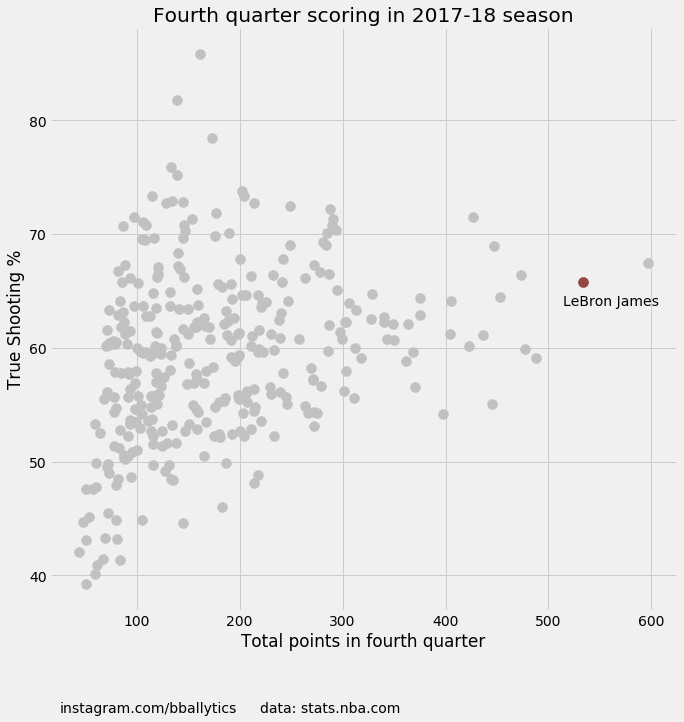

In [15]:
plt.figure(figsize=(10, 10))
plt.scatter(fourth_quarter_stats.PTS, fourth_quarter_stats.TS_PCT, s=100, c="#C1C1C1")
lebron_series = fourth_quarter_stats.loc[fourth_quarter_stats.PLAYER_NAME == "LeBron James"]
plt.scatter(lebron_series.PTS, lebron_series.TS_PCT, s=100, c="#984545")
plt.text(lebron_series.PTS-20, lebron_series.TS_PCT-2, s="LeBron James")

plt.title("Fourth quarter scoring in 2017-18 season")
plt.ylabel("True Shooting %")
plt.xlabel("Total points in fourth quarter")

plt.text(x=25, y=28, s="instagram.com/bballytics")
plt.text(x=220, y=28, s="data: stats.nba.com")
plt.savefig('fourth_quarter.png', bbox_inches='tight')
plt.show()

In [20]:
pwd

'/Users/stevenmobley'